In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D graphs

In [2]:
# Define two functions, one with linear algebra notation, another one using matrix notation that operates at the cell level
def g(w):
    return w.T.dot(w)

def gg(X, Y):
    return X**2 + Y**2

In [3]:
# define a range of values from the input space
w1 = np.linspace(-6, 6, num=30)
w11, w22 = np.meshgrid(w1, w1)
print(w11.shape)
print(w22.shape)
# The resulting matricies contain inputs, such that input vectors are (w11[i, j], w22[i, j]) transposed
# this is the format preferred by matplotplib
print("First input vector (%d, %d)" % (w11[0, 0], w22[0, 0]))
last_idx = len(w11) - 1
print("Last input vector (%d, %d)" % (w11[last_idx, last_idx], w22[last_idx, last_idx]))

(30, 30)
(30, 30)
First input vector (-6, -6)
Last input vector (6, 6)


In [4]:
# If we want linear algebra inputs, we may need to ravel() these guys
combined_input = np.column_stack((w11.ravel(), w22.ravel()))
print(combined_input.shape)
# Here, each row represents a transposed input vector

(900, 2)


In [5]:
# Calculate output linear algebra way
z = np.apply_along_axis(g, 1, combined_input)
print(z.shape)

(900,)


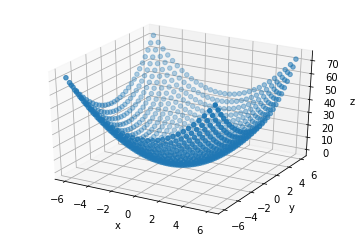

In [6]:
# Scatter graph is the easiest, it does not require a 2D input
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(combined_input[:, 0], combined_input[:, 1], z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

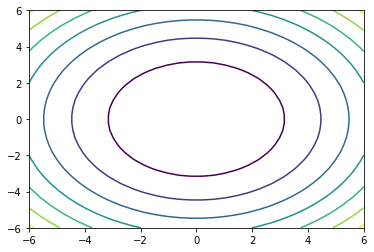

In [7]:
# 2D contour graph require inputs to be in a 'grid' format, i.e. X matrix, Y matrix, and z (also matrix)
# a simple way to do that is to use gg function (instead of linear alg form)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.contour(w11, w22, gg(w11, w22));

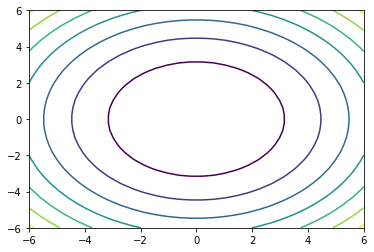

In [8]:
# Another way is to reshape output z back into 2D
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.contour(w11, w22, z.reshape(len(w11), len(w22)));

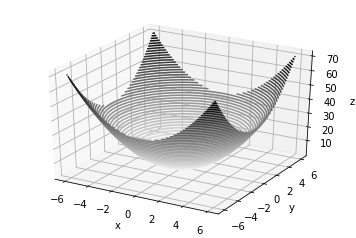

In [9]:
# 3-D graph uses the same principles
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.contour3D(w11, w22, z.reshape(len(w11), len(w22)), 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

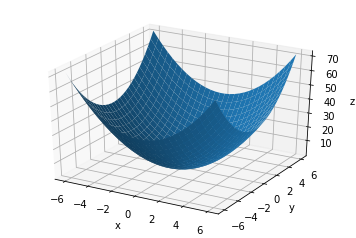

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w11, w22, z.reshape(len(w11), len(w22)))
#ax.plot_wireframe(combined[:, 0], combined[:, 1], z, color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

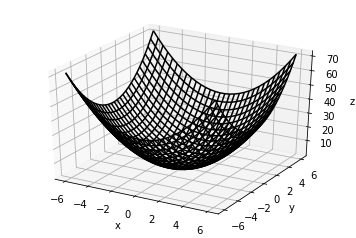

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(w11, w22, z.reshape(len(w11), len(w22)), color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');